In [1]:
%matplotlib inline

# Boilerplate code: set up the environment
import matplotlib.pyplot as plt
import pandas
import scipy
import seaborn
seaborn.set_style("white")
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#cc33cc',
          '#fb9a99', '#e31a1c', '#fdbf6f']
specieslist = ['Amel', 'Bter', 'Hsal', 'Cflo', 'Pdom', 'Pcan', 'Nvit']
seaborn.set_context({"figure.figsize": (15, 10)})

In [2]:
def load_and_prep(filename, index='Species'):
    """Boilerplate code: load data into memory"""
    dataframe = pandas.read_table(filename)
    df = dataframe[dataframe[index].isin(specieslist)]
    df = df.set_index([index]).reindex(specieslist)
    return df

In [3]:
def make_barplot(dataframe, xlab=None, ylab=None, ylim=None, lloc=2,
                 legend=True, yticks=None, yticklabs=None):
    """Biolerplate code: make a pretty barplot"""

    plot = dataframe.plot(kind='bar', stacked=True, figsize=(15, 10),
                          fontsize=16, rot=0, color=colors)
    seaborn.despine(left=True)
    if legend is True:
        _ = plot.legend(loc=lloc, prop={'size': 16})
    if xlab is not None:
        _ = plt.xlabel(xlab)
    if ylab is not None:
        _ = plt.ylabel(ylab)
    if ylim is not None:
        _ = plot.set_ylim(ylim[0], ylim[1])
    if yticks:
        _ = plot.set_yticks(yticks)
    if yticklabs:
        _ = plot.set_yticklabels(yticklabs)
    _ = plot.yaxis.label.set_fontsize(18)

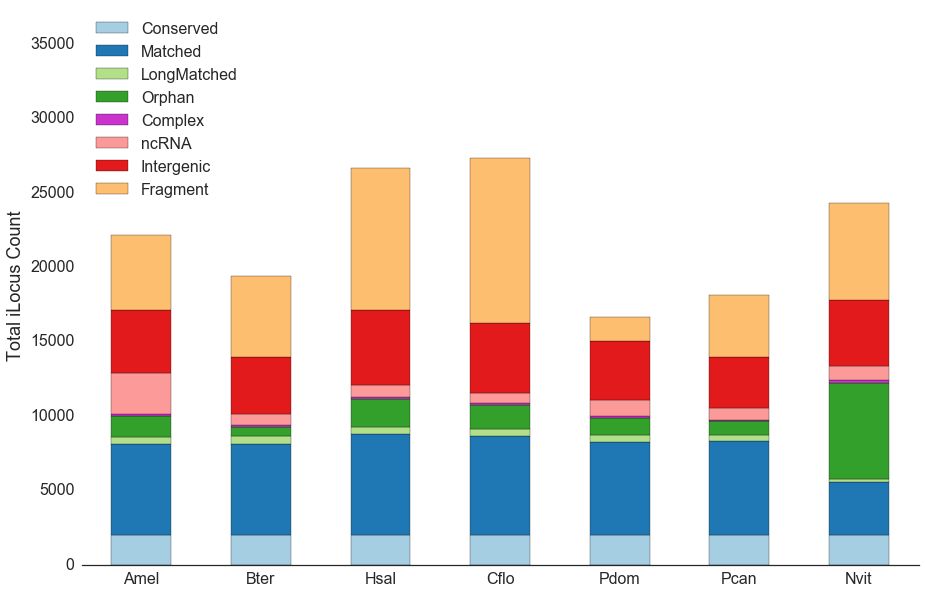

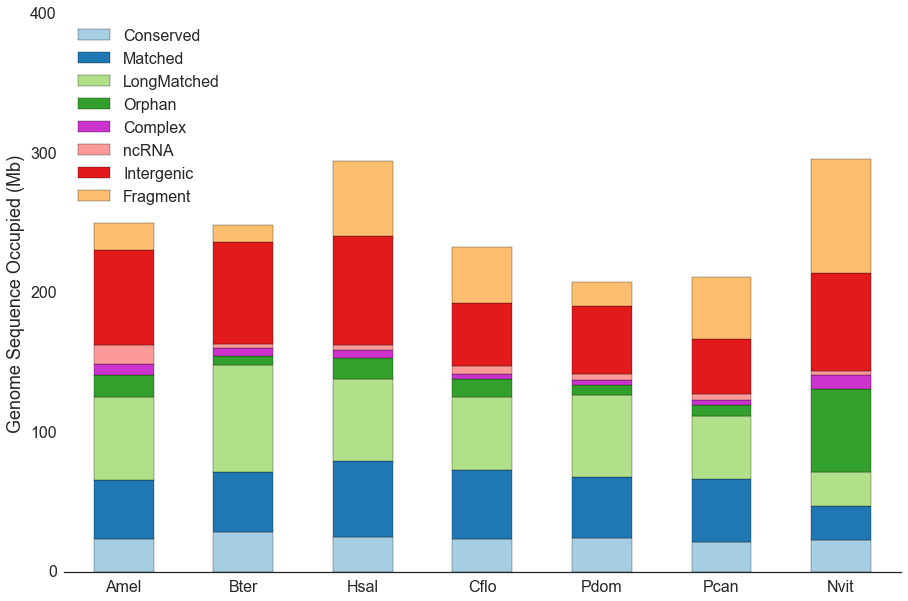

In [4]:
# Now, the actual procedure
bd_bp = load_and_prep('hymhub-breakdown-bp.tsv')
bd_counts = load_and_prep('hymhub-breakdown-counts.tsv')
make_barplot(bd_counts, xlab='', ylim=(0, 3.75e4),
             ylab='Total iLocus Count')
make_barplot(bd_bp, xlab='', ylim=(0, 4e8),
             yticks=[10e7 * x for x in [0,1,2,3,4]],
             yticklabs=['0', '100', '200', '300', '400'],
             ylab='Genome Sequence Occupied (Mb)')